In [233]:
import random
residues_4=["A","G","C","U"]
residue_4_uniform_distribution=[0.25,0.5,0.75,1.0]
residue_4_non_uniform_human_distribution=[0.309,0.508,0.706,1.0] # Human genome

residues_5=["A","G","C","U","I"]
#residue_5_distribution=[0.24995,0.4999,0.74985,0.9998,1.0] # Assuming inosine is 0.02% of the genome
residue_5_distribution=[0.245,0.49,0.735,0.98,1.0] # Assuming inosine is 2% of the genome

In [150]:
import seaborn
seaborn.set_context("talk")

import numpy as np
import matplotlib.pyplot as plt

In [241]:
def func_generate_genome_residues_4_uniform_distribution(L):
    G=""

    for i in range(L):
        x=random.random()
        if (x<residue_4_uniform_distribution[0]):
            G+=residues_4[0]
        elif x<residue_4_uniform_distribution[1]:
            G+=residues_4[1]
        elif x<residue_4_uniform_distribution[2]:
            G+=residues_4[2]
        else:
            G+=residues_4[3]
        
    return G

def func_generate_genome_residues_4_non_uniform_human_distribution(L):
    G=""

    for i in range(L):
        x=random.random()
        if (x<residue_4_non_uniform_human_distribution[0]):
            G+=residues_4[0]
        elif x<residue_4_non_uniform_human_distribution[1]:
            G+=residues_4[1]
        elif x<residue_4_non_uniform_human_distribution[2]:
            G+=residues_4[2]
        else:
            G+=residues_4[3]
        
    return G

def func_generate_genome_residues_5_with_inosine(L):
    G=""

    for i in range(L):
        x=random.random()
        if (x<residue_5_distribution[0]):
            G+=residues_5[0]
        elif x<residue_5_distribution[1]:
            G+=residues_5[1]
        elif x<residue_5_distribution[2]:
            G+=residues_5[2]
        elif x<residue_5_distribution[3]:
            G+=residues_5[3]
        else:
            G+=residues_5[4]
        
    return G

In [152]:
def func_generate_complementary_strand(genome):
    
    G=""

    b1=["A","G","C","U","I"]
    b2=["U","C","G","A","C"]
    
    for i in range(len(genome)):
        b1_index=b1.index(genome[i])
        G+=b2[b1_index]
    
    assert len(G)==len(genome)
    
    return G

In [153]:
def func_unique_oligos_of_size_K(genome, oligo_size):

    K=oligo_size
    test_str = genome+genome

    if K>len(genome):
#        print("Substring size is greater than test string size!")
        return []
    else:
        res = [test_str[i: j] for i in range(len(test_str)) for j in range(i + 1, len(test_str) + 1) if len(test_str[i:j]) == K] 
        unique_res=set(res)
        return unique_res

In [154]:
def func_oligos_for_single_strand(genome):

    all_oligos=[]
    for i in range(smallest_oligo_size,largest_oligo_size+1):
        oligo_size=i
        oligos_size_K=func_unique_oligos_of_size_K(genome, oligo_size)
        for item in oligos_size_K:
            all_oligos.append(item)
        
    return all_oligos

In [155]:
def func_return_unique_oligos_given_genome(genome,smallest_oligo_size,largest_oligo_size):

    complementary_strand_genome=func_generate_complementary_strand(genome)
    genome_all_oligos=func_oligos_for_single_strand(genome)
    complementary_strand_genome_all_oligos=func_oligos_for_single_strand(complementary_strand_genome)
    
    master_all_oligos=genome_all_oligos+complementary_strand_genome_all_oligos
    
    master_all_oligos_unique=set(master_all_oligos)
        
    return master_all_oligos_unique

In [156]:
def func_run_iterations_collect_data(L,smallest_oligo_size,largest_oligo_size,N_ITER,distribution):
    
    num_unique_oligos=[]
    
    for i in range(N_ITER):
        if distribution=="residue_4_uniform_distribution":
            genome=func_generate_genome_residues_4_uniform_distribution(L)
        elif distribution=="residue_4_non_uniform_human_distribution":
            genome=func_generate_genome_residues_4_non_uniform_human_distribution(L)
        elif distribution=="residue_5_with_inosine":
            genome=func_generate_genome_residues_5_with_inosine(L)
        
        master_all_oligos_unique=func_return_unique_oligos_given_genome(genome,smallest_oligo_size,largest_oligo_size)
        num_unique_oligos.append(len(master_all_oligos_unique))
        
    return num_unique_oligos

# Generate unique oligos for a given genome

In [39]:
####
## Randomly generated genome
####
L=3
genome=func_generate_genome_residues_4_uniform_distribution(L)

####
## User provided genome
####
#genome="AAA" 

smallest_oligo_size=2 # Smallest oligomer size
largest_oligo_size=10 # Largest oligomer size

complementary_strand_genome=func_generate_complementary_strand(genome)
print("Genome strand: \t\t"+genome)
print("Complementary strand: \t"+complementary_strand_genome)
master_all_oligos_unique=func_return_unique_oligos_given_genome(genome,smallest_oligo_size,largest_oligo_size)
print("Unique oligos: \t\t"+str(master_all_oligos_unique))
print("# of unique oligos: \t"+str(len(master_all_oligos_unique)))

Genome strand: 		AUA
Complementary strand: 	UAU
Unique oligos: 		{'UU', 'UA', 'UUA', 'AUA', 'AAU', 'AA', 'UAU', 'UAA', 'AU', 'AUU'}
# of unique oligos: 	10


# Number of unique oligos for an ensemble of randomly generated genomes 

Uniform base distribution

In [244]:
distribution="residue_4_uniform_distribution"
#distribution="residue_4_non_uniform_human_distribution"
#distribution="residue_5_with_inosine"

Text(0, 0.5, '# of unique oligos')

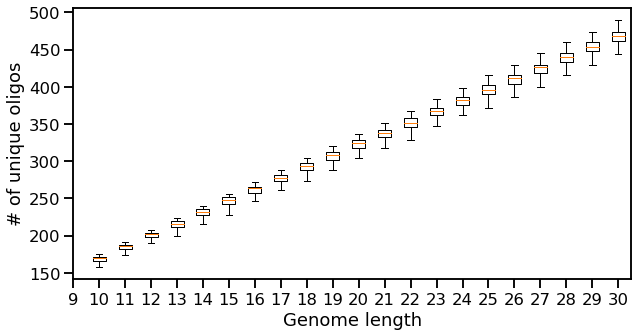

In [246]:
smallest_genome_size=10
largest_genome_size=31

smallest_oligo_size=2 # Smallest oligomer size
largest_oligo_size=10 # Largest oligomer size

N_ITER=10000
step=1

data=[]
for L in range(smallest_genome_size,largest_genome_size,step): # Length of genome
    num_unique_oligos_genome_length_L=func_run_iterations_collect_data(L,smallest_oligo_size,largest_oligo_size,N_ITER,distribution)
    data.append(num_unique_oligos_genome_length_L)
    
assert len(data)==(largest_genome_size-smallest_genome_size)/step
assert len(data[0])==N_ITER

np.save("data_L_10_31_step1_2_10.npy",data)

plt.figure(figsize=(10,5))

plt.boxplot(data,showfliers=False)

plt.xticks(range(len(data)+1),range(smallest_genome_size-step,largest_genome_size,step))
plt.xlabel("Genome length")
plt.ylabel("# of unique oligos")

Text(0, 0.5, '# of unique oligos')

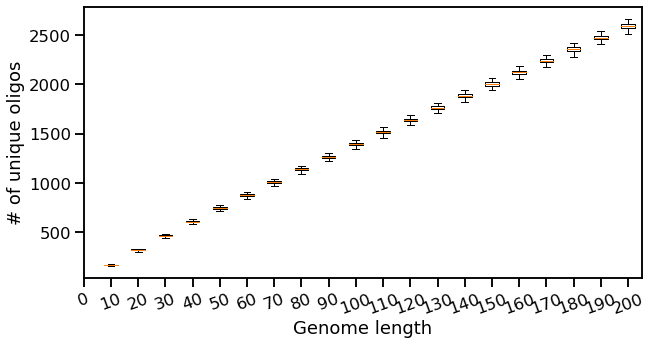

In [247]:
smallest_genome_size=10
largest_genome_size=210

smallest_oligo_size=2 # Smallest oligomer size
largest_oligo_size=10 # Largest oligomer size

N_ITER=1000
step=10

data=[]
for L in range(smallest_genome_size,largest_genome_size,step): # Length of genome
    num_unique_oligos_genome_length_L=func_run_iterations_collect_data(L,smallest_oligo_size,largest_oligo_size,N_ITER,distribution)
    data.append(num_unique_oligos_genome_length_L)
    
assert len(data)==(largest_genome_size-smallest_genome_size)/step
assert len(data[0])==N_ITER

np.save("data_L_10_210_step10_2_10.npy",data)

plt.figure(figsize=(10,5))

plt.boxplot(data,showfliers=False)

plt.xticks(range(len(data)+1),range(smallest_genome_size-step,largest_genome_size,step),rotation=20)
plt.xlabel("Genome length")
plt.ylabel("# of unique oligos")

Non uniform base distribution

In [234]:
#distribution="residue_4_uniform_distribution"
distribution="residue_4_non_uniform_human_distribution"
#distribution="residue_5_with_inosine"

Text(0, 0.5, '# of unique oligos')

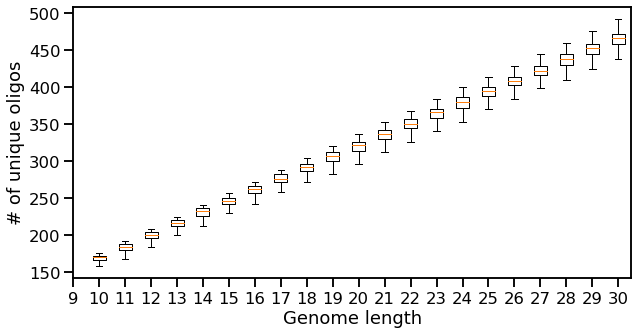

In [235]:
smallest_genome_size=10
largest_genome_size=31

smallest_oligo_size=2 # Smallest oligomer size
largest_oligo_size=10 # Largest oligomer size

N_ITER=10000
step=1

data=[]
for L in range(smallest_genome_size,largest_genome_size,step): # Length of genome
    num_unique_oligos_genome_length_L=func_run_iterations_collect_data(L,smallest_oligo_size,largest_oligo_size,N_ITER,distribution)
    data.append(num_unique_oligos_genome_length_L)
    
assert len(data)==(largest_genome_size-smallest_genome_size)/step
assert len(data[0])==N_ITER

np.save("data_L_10_31_step1_2_10_non_uniform_human.npy",data)

plt.figure(figsize=(10,5))

plt.boxplot(data,showfliers=False)

plt.xticks(range(len(data)+1),range(smallest_genome_size-step,largest_genome_size,step))
plt.xlabel("Genome length")
plt.ylabel("# of unique oligos")

Text(0, 0.5, '# of unique oligos')

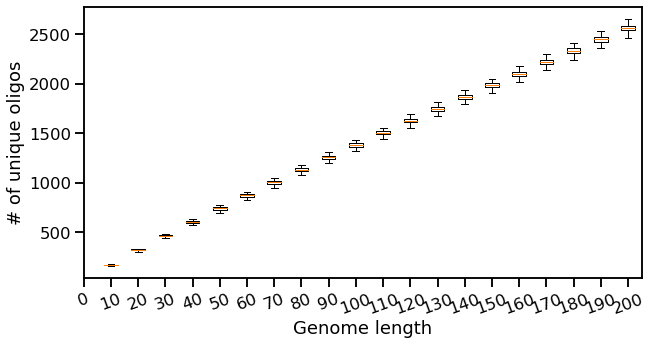

In [236]:
smallest_genome_size=10
largest_genome_size=210

smallest_oligo_size=2 # Smallest oligomer size
largest_oligo_size=10 # Largest oligomer size

N_ITER=1000
step=10

data=[]
for L in range(smallest_genome_size,largest_genome_size,step): # Length of genome
    num_unique_oligos_genome_length_L=func_run_iterations_collect_data(L,smallest_oligo_size,largest_oligo_size,N_ITER,distribution)
    data.append(num_unique_oligos_genome_length_L)
    
assert len(data)==(largest_genome_size-smallest_genome_size)/step
assert len(data[0])==N_ITER

np.save("data_L_10_210_step10_2_10_non_uniform_human.npy",data)

plt.figure(figsize=(10,5))

plt.boxplot(data,showfliers=False)

plt.xticks(range(len(data)+1),range(smallest_genome_size-step,largest_genome_size,step),rotation=20)
plt.xlabel("Genome length")
plt.ylabel("# of unique oligos")

Including an alternate base, inosine

In [237]:
#distribution="residue_4_uniform_distribution"
#distribution="residue_4_non_uniform_human_distribution"
distribution="residue_5_with_inosine"

Text(0, 0.5, '# of unique oligos')

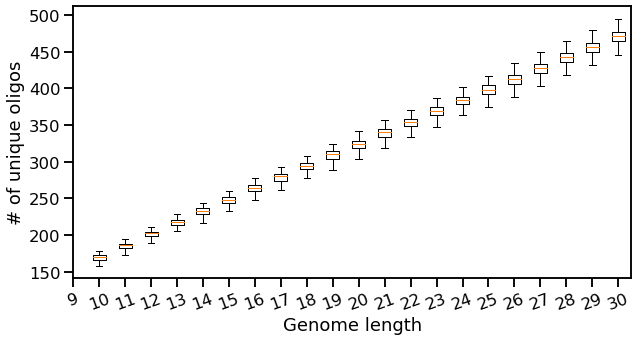

In [242]:
smallest_genome_size=10
largest_genome_size=31

smallest_oligo_size=2 # Smallest oligomer size
largest_oligo_size=10 # Largest oligomer size

N_ITER=10000
step=1

data=[]
for L in range(smallest_genome_size,largest_genome_size,step): # Length of genome
    num_unique_oligos_genome_length_L=func_run_iterations_collect_data(L,smallest_oligo_size,largest_oligo_size,N_ITER,distribution)
    data.append(num_unique_oligos_genome_length_L)
    
assert len(data)==(largest_genome_size-smallest_genome_size)/step
assert len(data[0])==N_ITER

np.save("data_L_10_31_step1_2_10_with_inosine.npy",data)

plt.figure(figsize=(10,5))

plt.boxplot(data,showfliers=False)

plt.xticks(range(len(data)+1),range(smallest_genome_size-step,largest_genome_size,step),rotation=20)
plt.xlabel("Genome length")
plt.ylabel("# of unique oligos")

Text(0, 0.5, '# of unique oligos')

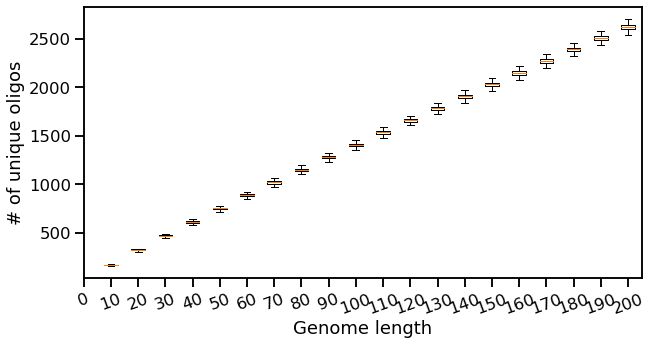

In [243]:
smallest_genome_size=10
largest_genome_size=210

smallest_oligo_size=2 # Smallest oligomer size
largest_oligo_size=10 # Largest oligomer size

N_ITER=1000
step=10

data=[]
for L in range(smallest_genome_size,largest_genome_size,step): # Length of genome
    num_unique_oligos_genome_length_L=func_run_iterations_collect_data(L,smallest_oligo_size,largest_oligo_size,N_ITER,distribution)
    data.append(num_unique_oligos_genome_length_L)
    
assert len(data)==(largest_genome_size-smallest_genome_size)/step
assert len(data[0])==N_ITER

np.save("data_L_10_210_step10_2_10_with_inosine.npy",data)

plt.figure(figsize=(10,5))

plt.boxplot(data,showfliers=False)

plt.xticks(range(len(data)+1),range(smallest_genome_size-step,largest_genome_size,step),rotation=20)
plt.xlabel("Genome length")
plt.ylabel("# of unique oligos")